In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [6]:
GREEN = sns.color_palette("Set3")[0]
RED = sns.color_palette("Set3")[3]

In [7]:
rgb_colors = sns.color_palette("Set3")
hex_colors = list(map(matplotlib.colors.rgb2hex, rgb_colors))

In [8]:
df = pd.read_csv('stats1.csv')
df

,Region,Content,Country,child-directed,irrelevant,inappropriate,inaudible,excluded
0,High,Unlabelled,France,14,119,16,1,0
1,High,Unlabelled,UK,8,122,19,0,1
2,High,Unlabelled,US,9,122,16,1,2
3,High,Unlabelled,Sweden,10,131,4,5,0
4,High,Unlabelled,Germany,10,131,7,1,1
5,Low,Unlabelled,Pakistan,10,103,28,8,1
6,Low,Unlabelled,Morocco,10,110,23,7,0
7,Low,Unlabelled,Bangladesh,9,94,43,4,0
8,Low,Unlabelled,Sri Lanka,17,89,43,1,0
9,Low,Unlabelled,Venezuela,5,77,53,13,2


In [9]:
## new
df.rename(columns = {'inaudible':'ambiguous'}, inplace = True)
labelled_df = df[df['Content']=="Labelled"].copy()
labelled_df

,Region,Content,Country,child-directed,irrelevant,inappropriate,ambiguous,excluded
10,High,Labelled,France,24,118,7,1,0
11,High,Labelled,UK,28,115,4,3,0
12,High,Labelled,US,36,110,4,0,0
13,High,Labelled,Sweden,25,115,7,3,0
14,High,Labelled,Germany,31,114,5,0,0
15,Low,Labelled,Pakistan,10,93,30,10,7
16,Low,Labelled,Morocco,14,89,33,14,0
17,Low,Labelled,Bangladesh,13,83,44,10,0
18,Low,Labelled,Sri Lanka,13,74,53,8,2
19,Low,Labelled,Venezuela,12,73,56,9,0


In [10]:
high1_df =  df[(df['Content']=="Labelled") & (df['Region']=="High")].copy()
high1_df.drop(columns=['Region','Content'],inplace=True)
high1_df

,Country,child-directed,irrelevant,inappropriate,ambiguous,excluded
10,France,24,118,7,1,0
11,UK,28,115,4,3,0
12,US,36,110,4,0,0
13,Sweden,25,115,7,3,0
14,Germany,31,114,5,0,0


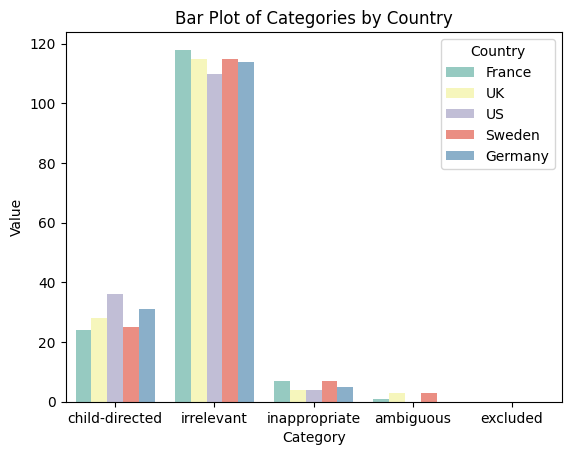

In [11]:
# Melt the DataFrame to convert columns to rows
sns.set_palette("Set3")
melted_df = pd.melt(high1_df, id_vars=["Country"], var_name="category", value_name="value")
melted_df
# # Plot the bar plot
sns.barplot(x="category", y="value", hue="Country", data=melted_df)
plt.xlabel("Category")
plt.ylabel("Value")
plt.title("Bar Plot of Categories by Country")

plt.show()

In [12]:
melted_df['proportion'] = melted_df['value']/150

In [13]:
display(melted_df)

,Country,category,value,proportion
0,France,child-directed,24,0.160000
1,UK,child-directed,28,0.186667
2,US,child-directed,36,0.240000
3,Sweden,child-directed,25,0.166667
4,Germany,child-directed,31,0.206667
5,France,irrelevant,118,0.786667
6,UK,irrelevant,115,0.766667
7,US,irrelevant,110,0.733333
8,Sweden,irrelevant,115,0.766667
9,Germany,irrelevant,114,0.760000


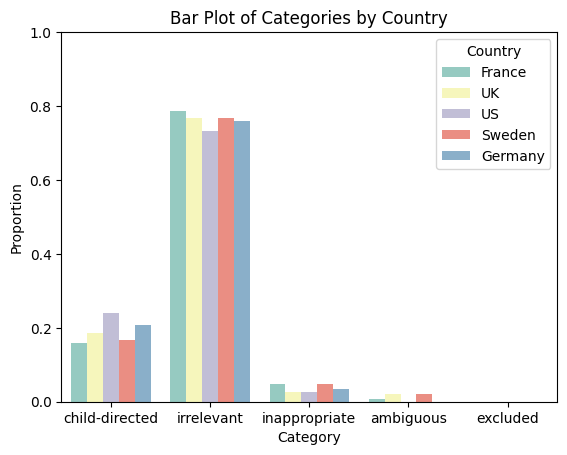

In [14]:
sns.set_palette("Set3")
sns.barplot(x="category", y="proportion", hue="Country", data=melted_df)
plt.xlabel("Category")
plt.ylabel("Proportion")
plt.title("Bar Plot of Categories by Country")
plt.ylim(0, 1)

plt.show()

## Low policy analysis


In [15]:
low1_df =  df[(df['Content']=="Labelled") & (df['Region']=="Low")].copy()
low1_df.drop(columns=['Region','Content'],inplace=True)
low1_df

,Country,child-directed,irrelevant,inappropriate,ambiguous,excluded
15,Pakistan,10,93,30,10,7
16,Morocco,14,89,33,14,0
17,Bangladesh,13,83,44,10,0
18,Sri Lanka,13,74,53,8,2
19,Venezuela,12,73,56,9,0


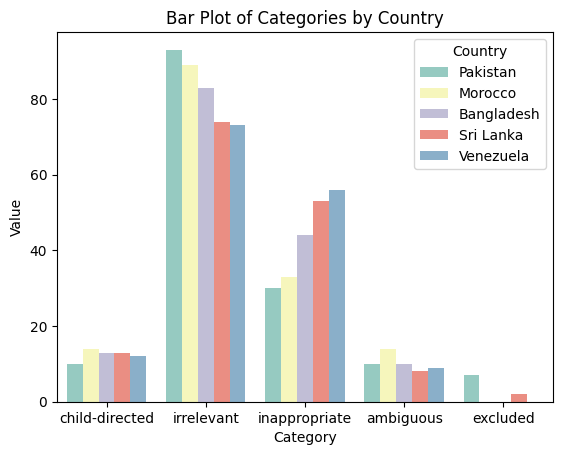

In [16]:
# Melt the DataFrame to convert columns to rows
sns.set_palette("Set3")
low_melted_df = pd.melt(low1_df, id_vars=["Country"], var_name="category", value_name="value")

# # Plot the bar plot
sns.barplot(x="category", y="value", hue="Country", data=low_melted_df)
plt.xlabel("Category")
plt.ylabel("Value")
plt.title("Bar Plot of Categories by Country")

plt.show()

In [17]:
low_melted_df['proportion'] = low_melted_df['value']/150

In [18]:
display(low_melted_df)

,Country,category,value,proportion
0,Pakistan,child-directed,10,0.066667
1,Morocco,child-directed,14,0.093333
2,Bangladesh,child-directed,13,0.086667
3,Sri Lanka,child-directed,13,0.086667
4,Venezuela,child-directed,12,0.080000
5,Pakistan,irrelevant,93,0.620000
6,Morocco,irrelevant,89,0.593333
7,Bangladesh,irrelevant,83,0.553333
8,Sri Lanka,irrelevant,74,0.493333
9,Venezuela,irrelevant,73,0.486667


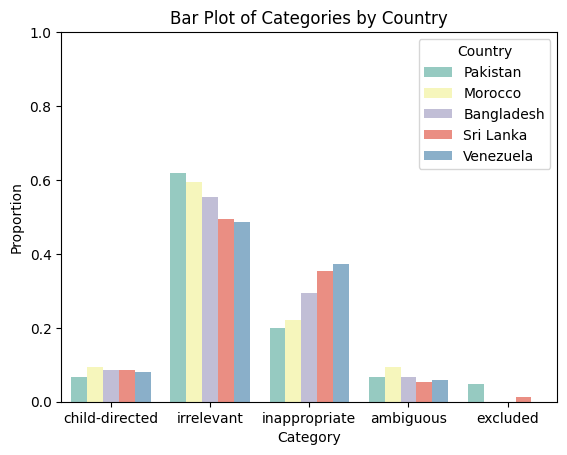

In [19]:
sns.set_palette("Set3")
sns.barplot(x="category", y="proportion", hue="Country", data=low_melted_df)
plt.xlabel("Category")
plt.ylabel("Proportion")
plt.title("Bar Plot of Categories by Country")
plt.ylim(0, 1)

plt.show()

## All countries (Labelled)

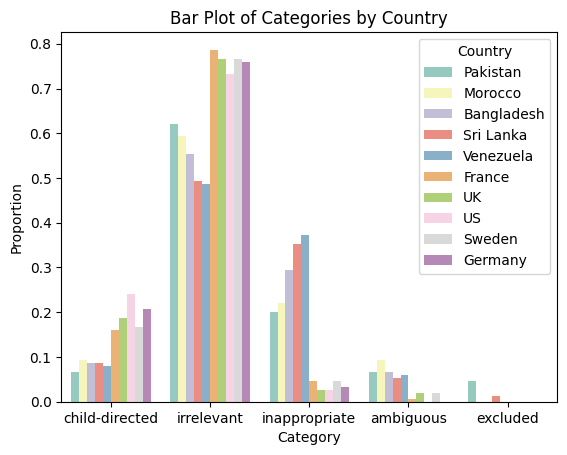

In [20]:
all_1 = pd.concat([low_melted_df,melted_df])
sns.set_palette("Set3")
sns.barplot(x="category", y="proportion", hue="Country", data=all_1)
plt.xlabel("Category")
plt.ylabel("Proportion")
plt.title("Bar Plot of Categories by Country")

plt.show()

## Aggregated (Labelled)


In [53]:
agg_df = pd.read_csv('aggPrimaryTags.csv')
agg_df

,Region,Content,child-directed,irrelevant,inappropriate,ambiguous,excluded
0,High,Unlabelled,51,625,62,8,4
1,Low,Unlabelled,51,473,190,33,3
2,High,Labelled,144,572,27,7,0
3,Low,Labelled,62,412,216,51,9


In [54]:
new_agg_df = agg_df.copy()

In [55]:

new_agg_df["child-directed"] = new_agg_df["child-directed"]/750
new_agg_df["irrelevant"] = new_agg_df["irrelevant"]/750
new_agg_df["inappropriate"] = new_agg_df["inappropriate"]/750
new_agg_df["excluded"] = new_agg_df["excluded"]/750
new_agg_df["ambiguous"] = new_agg_df["ambiguous"]/750



In [56]:
new_agg_df[new_agg_df['Region']=="Low"]

,Region,Content,child-directed,irrelevant,inappropriate,ambiguous,excluded
1,Low,Unlabelled,0.068000,0.630667,0.253333,0.044,0.004
3,Low,Labelled,0.082667,0.549333,0.288000,0.068,0.012


In [57]:
new_agg_df[new_agg_df['Region']=="High"]

,Region,Content,child-directed,irrelevant,inappropriate,ambiguous,excluded
0,High,Unlabelled,0.068,0.833333,0.082667,0.010667,0.005333
2,High,Labelled,0.192,0.762667,0.036000,0.009333,0.000000


In [22]:
labelled_agg = agg_df[agg_df['Content']=="Labelled"].copy()
labelled_agg.drop(columns='Content',inplace=True)
labelled_agg

,Region,child-directed,irrelevant,inappropriate,ambiguous,excluded
2,High,144,572,27,7,0
3,Low,62,412,216,51,9


In [23]:
# Melt the DataFrame to convert columns to rows
melted_agg1 = pd.melt(labelled_agg, id_vars=["Region"], var_name="category", value_name="value")
melted_agg1

,Region,category,value
0,High,child-directed,144
1,Low,child-directed,62
2,High,irrelevant,572
3,Low,irrelevant,412
4,High,inappropriate,27
5,Low,inappropriate,216
6,High,ambiguous,7
7,Low,ambiguous,51
8,High,excluded,0
9,Low,excluded,9


In [24]:
melted_agg1['proportion'] = melted_agg1['value']/750

In [25]:
melted_agg1

,Region,category,value,proportion
0,High,child-directed,144,0.192000
1,Low,child-directed,62,0.082667
2,High,irrelevant,572,0.762667
3,Low,irrelevant,412,0.549333
4,High,inappropriate,27,0.036000
5,Low,inappropriate,216,0.288000
6,High,ambiguous,7,0.009333
7,Low,ambiguous,51,0.068000
8,High,excluded,0,0.000000
9,Low,excluded,9,0.012000


In [26]:
melted_agg1.query('category in ["inappropriate","child-directed"]')

,Region,category,value,proportion
0,High,child-directed,144,0.192000
1,Low,child-directed,62,0.082667
4,High,inappropriate,27,0.036000
5,Low,inappropriate,216,0.288000


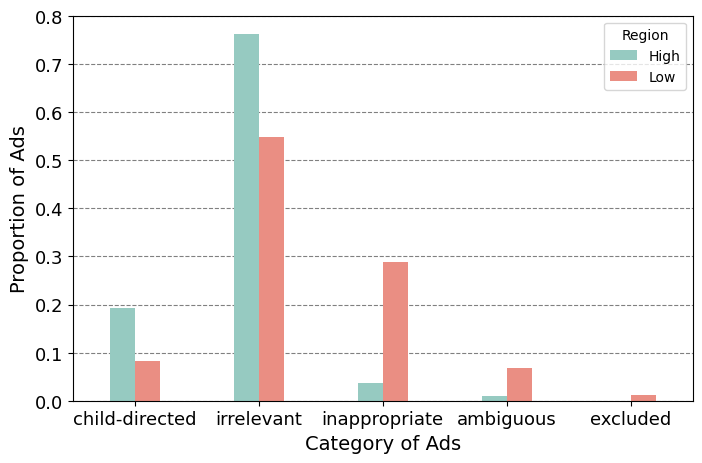

In [27]:
# Plot the bar plot
fig = plt.figure(figsize=(8, 5))
ax = plt.gca()

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

sns.barplot(x="category", y="proportion", hue="Region", data=melted_agg1,palette=[GREEN,RED],width=0.4)

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y',labelsize=13)


plt.xlabel("Category of Ads",fontsize=14)
plt.ylabel("Proportion of Ads",fontsize=14)


# plt.title("Bar Plot of Categories by Region")



plt.show()

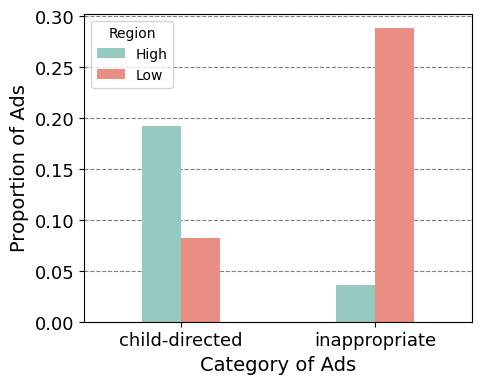

In [28]:
fig = plt.figure(figsize=(5, 4))
ax = plt.gca()

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')


sns.barplot(x="category", y="proportion", hue="Region", data=melted_agg1.query('category in ["inappropriate","child-directed"]'),palette=[GREEN,RED],width=0.4)
plt.xlabel("Category of Ads")
plt.ylabel("Proportion of Ads")

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y',labelsize=13)


plt.xlabel("Category of Ads",fontsize=14)
plt.ylabel("Proportion of Ads",fontsize=14)

plt.show()

# Mild, moderate, extreme (Labelled)

In [29]:
colors = sns.color_palette("Reds")[1:]

In [30]:
inapp_df = pd.read_csv('ratings.csv')
inapp_df

,Content,Region,Country,Mild,Moderate,Extreme
0,Labelled,High,France,4,0,3
1,Labelled,High,UK,4,0,0
2,Labelled,High,US,3,0,1
3,Labelled,High,Sweden,7,1,0
4,Labelled,High,Germany,2,2,1
5,Labelled,Low,Pakistan,8,8,14
6,Labelled,Low,Morocco,12,7,14
7,Labelled,Low,Bangladesh,14,20,10
8,Labelled,Low,Sri Lanka,29,14,9
9,Labelled,Low,Venezuela,31,15,10


In [31]:
inapp_low_df = inapp_df[(inapp_df['Content']=="Labelled") & (inapp_df['Region']=="Low")].copy()
inapp_hi_df = inapp_df[(inapp_df['Content']=="Labelled") & (inapp_df['Region']=="High")].copy()

In [32]:
inapp_low_df.drop(columns = ['Content','Region'],inplace = True)
inapp_low_df

,Country,Mild,Moderate,Extreme
5,Pakistan,8,8,14
6,Morocco,12,7,14
7,Bangladesh,14,20,10
8,Sri Lanka,29,14,9
9,Venezuela,31,15,10


In [33]:
inapp_hi_df.drop(columns = ['Content','Region'],inplace = True)
inapp_hi_df

,Country,Mild,Moderate,Extreme
0,France,4,0,3
1,UK,4,0,0
2,US,3,0,1
3,Sweden,7,1,0
4,Germany,2,2,1


In [34]:
inapp_low_df['Mild'] = inapp_low_df['Mild']/150
inapp_low_df['Moderate'] = inapp_low_df['Moderate']/150
inapp_low_df['Extreme'] = inapp_low_df['Extreme']/150


<ipython-input-35-5fe102ba56a6>:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x="Country", y="value", hue="severity", data=inapp_low_melted_df,palette=colors)


(0.0, 0.225)

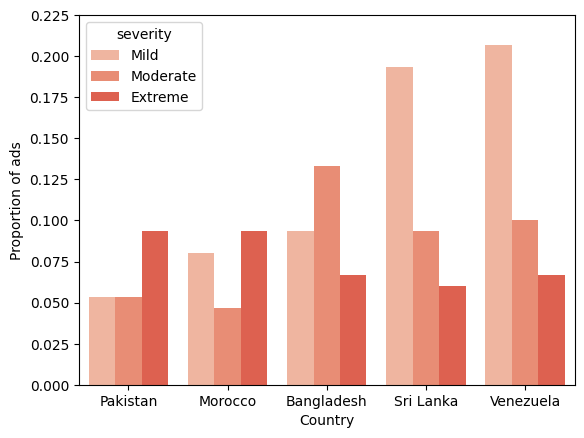

In [35]:
inapp_low_melted_df = pd.melt(inapp_low_df, id_vars=["Country"], var_name="severity", value_name="value")
# Plot the bar graph using seaborn
sns.barplot(x="Country", y="value", hue="severity", data=inapp_low_melted_df,palette=colors)
plt.ylabel("Proportion of ads")
plt.xlabel('Country')
plt.ylim(0,0.225)



In [36]:


inapp_hi_df['Mild'] = inapp_hi_df['Mild']/150
inapp_hi_df['Moderate'] = inapp_hi_df['Moderate']/150
inapp_hi_df['Extreme'] = inapp_hi_df['Extreme']/150


<ipython-input-37-56cae6c31d56>:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x="Country", y="value", hue="severity", data=inapp_hi_melted_df,palette=colors)


(0.0, 0.225)

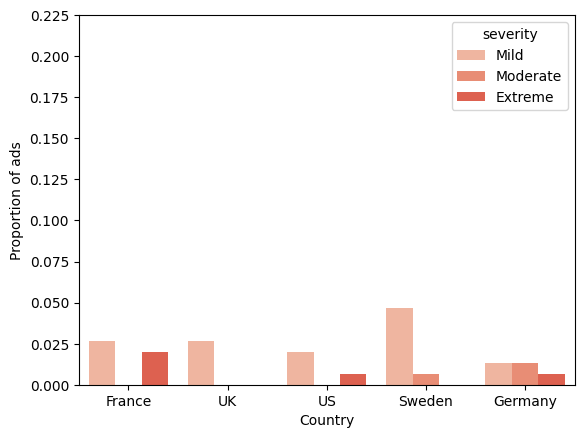

In [37]:
inapp_hi_melted_df = pd.melt(inapp_hi_df, id_vars=["Country"], var_name="severity", value_name="value")
# Plot the bar graph using seaborn
sns.barplot(x="Country", y="value", hue="severity", data=inapp_hi_melted_df,palette=colors)
plt.ylabel("Proportion of ads")
plt.xlabel('Country')
plt.ylim(0,0.225)



Aggregated

In [38]:
inapp_rating_df = pd.read_csv('aggRatings.csv')
inapp_rating_df

,Content,Region,Mild,Moderate,Extreme,Total
0,Labelled,High,20,3,5,28
1,Labelled,Low,94,64,57,215
2,Unlabelled,High,21,20,21,62
3,Unlabelled,Low,52,67,71,190


In [39]:
inapp_rating_df = inapp_rating_df[inapp_rating_df['Content']=="Labelled"].copy()
inapp_rating_df

,Content,Region,Mild,Moderate,Extreme,Total
0,Labelled,High,20,3,5,28
1,Labelled,Low,94,64,57,215


In [40]:
inapp_rating_df['Mild']=inapp_rating_df['Mild']/inapp_rating_df['Total']
inapp_rating_df['Moderate']=inapp_rating_df['Moderate']/inapp_rating_df['Total']
inapp_rating_df['Extreme']=inapp_rating_df['Extreme']/inapp_rating_df['Total']

In [41]:
inapp_rating_df.drop(columns=['Content','Total'],inplace=True)

In [42]:
inapp_rating_df

,Region,Mild,Moderate,Extreme
0,High,0.714286,0.107143,0.178571
1,Low,0.437209,0.297674,0.265116


In [43]:
melted_inapp_rating_df = pd.melt(inapp_rating_df, id_vars=["Region"], var_name="category", value_name="value")
melted_inapp_rating_df

,Region,category,value
0,High,Mild,0.714286
1,Low,Mild,0.437209
2,High,Moderate,0.107143
3,Low,Moderate,0.297674
4,High,Extreme,0.178571
5,Low,Extreme,0.265116


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725), (0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.6980392156862745, 0.8745098039215686, 0.5411764705882353), (0.2, 0.6274509803921569, 0.17254901960784313), (0.984313725490196, 0.6039215686274509, 0.6), (0.8901960784313725, 0.10196078431372549, 0.10980392156862745), (0.9921568627450981, 0.7490196078431373, 0.43529411764705883), (1.0, 0.4980392156862745, 0.0), (0.792156862745098, 0.6980392156862745, 0.8392156862745098), (0.41568627450980394, 0.23921568627450981, 0.6039215686274509), (1.0, 1.0, 0.6), (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]


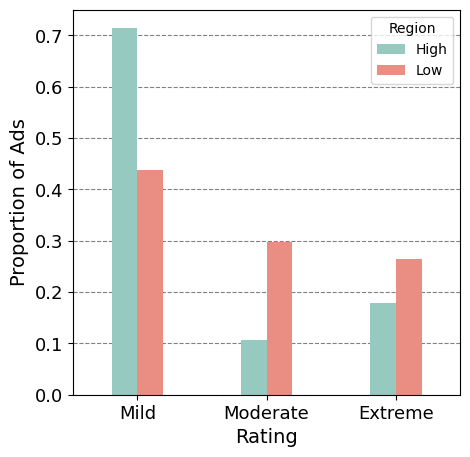

In [44]:
# colors = sns.color_palette("Set2")[2:]
colors = sns.color_palette("Paired")[0:]
print(colors)

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

sns.barplot(x="category", y="value", hue="Region", data=melted_inapp_rating_df,palette=[GREEN,RED],width=0.4)
plt.xlabel("Rating")
plt.ylabel("Proportion of inappropriate ads")

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y',labelsize=13)


plt.xlabel("Rating",fontsize=14)
plt.ylabel("Proportion of Ads",fontsize=14)


# plt.title("Bar Plot of Categories by Region")



plt.show()

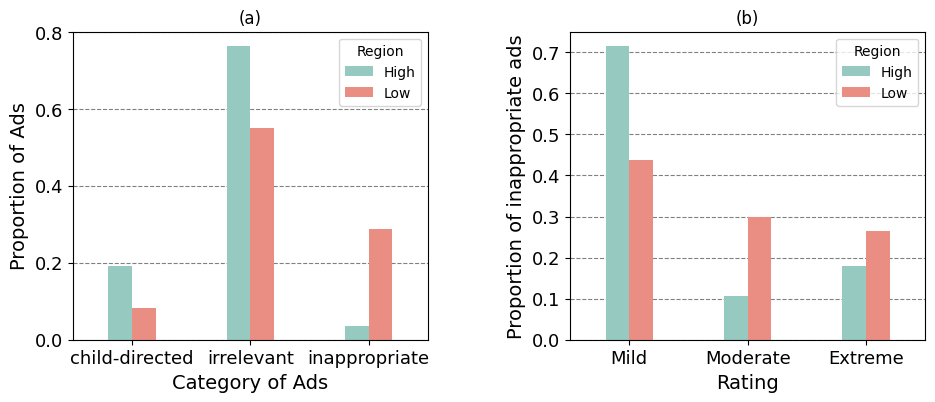

In [45]:
# Plot the bar plot
fig, axes = plt.subplots(1, 2,figsize=(11,4),gridspec_kw={'width_ratios': [1, 1],'wspace': 0.4})


sns.barplot(x="category", y="proportion", hue="Region", data=melted_agg1.query('category in ["inappropriate","child-directed","irrelevant"]'),palette=[GREEN,RED],width=0.4,ax=axes[0])

axes[0].set_title('(a)')
axes[0].set_xlabel("Category of Ads", fontsize=14)
axes[0].set_ylabel("Proportion of Ads", fontsize=14)

axes[0].tick_params(axis='x', labelsize=13)
axes[0].tick_params(axis='y', labelsize=13)

axes[0].set_axisbelow(True)
axes[0].grid(axis='y',color='gray', linestyle='dashed')


sns.barplot(x="category", y="value", hue="Region", data=melted_inapp_rating_df,palette=[GREEN,RED],width=0.4,ax=axes[1])

axes[1].set_title('(b)')
axes[1].set_xlabel("Rating",fontsize=14)
axes[1].set_ylabel("Proportion of inappropriate ads",fontsize=14)

axes[1].tick_params(axis='x', labelsize=13)
axes[1].tick_params(axis='y', labelsize=13)

axes[1].set_axisbelow(True)
axes[1].grid(axis='y',color='gray', linestyle='dashed')




plt.show()

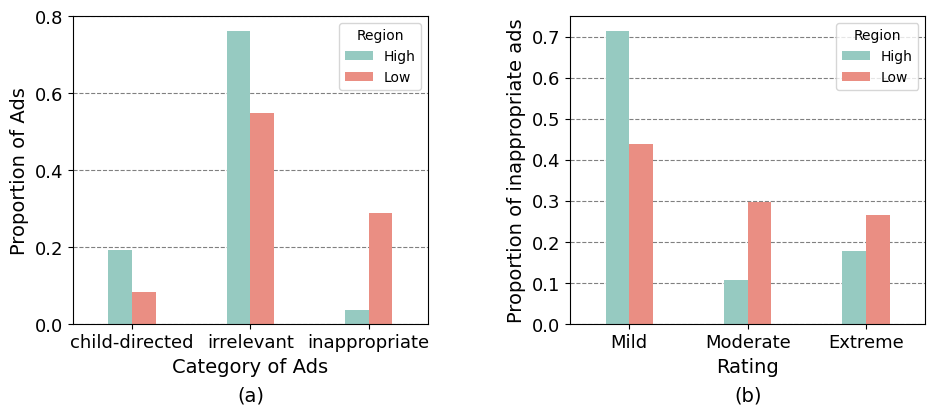

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.4})

sns.barplot(x="category", y="proportion", hue="Region", data=melted_agg1.query('category in ["inappropriate","child-directed","irrelevant"]'), palette=[GREEN, RED], width=0.4, ax=axes[0])
axes[0].set_xlabel("Category of Ads", fontsize=14)
axes[0].set_ylabel("Proportion of Ads", fontsize=14)
axes[0].tick_params(axis='x', labelsize=13)
axes[0].tick_params(axis='y', labelsize=13)
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='dashed')
axes[0].text(0.5, -0.25, '(a)', transform=axes[0].transAxes, fontsize=14, ha='center')

sns.barplot(x="category", y="value", hue="Region", data=melted_inapp_rating_df, palette=[GREEN, RED], width=0.4, ax=axes[1])
axes[1].set_xlabel("Rating", fontsize=14)
axes[1].set_ylabel("Proportion of inappropriate ads", fontsize=14)
axes[1].tick_params(axis='x', labelsize=13)
axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_axisbelow(True)
axes[1].grid(axis='y', color='gray', linestyle='dashed')
axes[1].text(0.5, -0.25, '(b)', transform=axes[1].transAxes, fontsize=14, ha='center')

plt.show()


In [47]:
melted_agg1

,Region,category,value,proportion
0,High,child-directed,144,0.192000
1,Low,child-directed,62,0.082667
2,High,irrelevant,572,0.762667
3,Low,irrelevant,412,0.549333
4,High,inappropriate,27,0.036000
5,Low,inappropriate,216,0.288000
6,High,ambiguous,7,0.009333
7,Low,ambiguous,51,0.068000
8,High,excluded,0,0.000000
9,Low,excluded,9,0.012000


# Unlabelled
